<a href="https://colab.research.google.com/github/jaimonjacob/mlstarter/blob/main/API_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
r = requests.get('https://api.mockaroo.com/api/5ae96660?count=50&key=8fac5610')
x = r.json()
df = pd.DataFrame(x)

In [ ]:
df.head()

,Skill,Person 1,Person 2,Person 3,Person 4
0,Internet Banking,7,5,2,1
1,CPIM,4,4,7,2
2,Pensions,7,7,4,8
3,XSS,5,7,1,5
4,PNF,5,2,6,4


In [ ]:
nf = df.iloc[:, 1:15]
scaler = MinMaxScaler()
scaler.fit(nf)
scaled = scaler.fit_transform(nf)
scaled_df = pd.DataFrame(scaled, columns = nf.columns)
scaled_df.head()

,Person 1,Person 2,Person 3,Person 4
0,0.857143,0.571429,0.142857,0.000000
1,0.428571,0.428571,0.857143,0.142857
2,0.857143,0.857143,0.428571,1.000000
3,0.571429,0.857143,0.000000,0.571429
4,0.571429,0.142857,0.714286,0.428571


In [ ]:
# Array of skill levels for each person
y_values_1 = scaled_df.iloc[0, :].to_list()
y_values_2 = scaled_df.iloc[1, :].to_list()
y_values_3 = scaled_df.iloc[2, :].to_list()
y_values_4 = scaled_df.iloc[3, :].to_list()
print(f'x_values_1: {y_values_1}')


# Array of skill names
y_labels = df["Skill"].to_list()
print(f'y_labels: {y_labels}')

# Array of person names
x_labels = list(scaled_df.columns.values)
print(f'x_labels: {x_labels}')


x_values_1: [0.8571428571428572, 0.5714285714285714, 0.14285714285714285, 0.0]
y_labels: ['Internet Banking', 'CPIM', 'Pensions', 'XSS', 'PNF', 'University Teaching', 'Alarm Systems', 'Konica', 'Hands-on Training', 'Komodo', 'Mystery Shopping', 'GNU Radio', 'IP CCTV', 'OMAP', 'XenClient', 'Distribution Center Operations', 'Construction Drawings', 'HSUPA', 'Yiddish', 'SDI', 'Nielsen Data', 'Aquaponics', 'SEP IRA', 'Omniture', '.NET', 'OAS Gold', 'FpML', 'Inventory Management', 'SSI', 'PTP', 'Research Ethics', 'Work Very Well with Others', 'Aquatics', 'Operations Management', 'Gas Chromatography', 'CVS', 'Solution Architecture', 'Qbasic', 'Product Launch', 'Mutual Funds', 'GPS Units', 'Pallet Jack', 'VMware Server', 'Asset Management', 'Interactive TV', 'TDM', 'FEED', 'AAT', 'CMake', 'Cytogenetics']
x_labels: ['Person 1', 'Person 2', 'Person 3', 'Person 4']


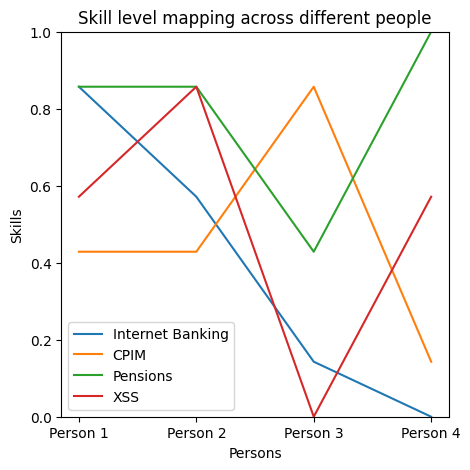

In [ ]:
plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.plot(y_values_1)
plt.plot(y_values_2)
plt.plot(y_values_3)
plt.plot(y_values_4)
plt.ylim(0, 1)
plt.legend(y_labels)
plt.xlabel('Persons')
plt.ylabel('Skills')
plt.title("Skill level mapping across different people")
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(x_labels)
plt.show()